In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import string
import numpy as np

In [3]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.3 MB/s 
     |████████████████████████████████| 182 kB 61.7 MB/s 
     |████████████████████████████████| 7.6 MB 54.6 MB/s 


In [ ]:
# https://openhumanitiesdata.metajnl.com/articles/10.5334/johd.33/
sentiments = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/MuSe: The Musical Sentiment Dataset.csv')

In [ ]:
sentiments['valence_tags'].mean()

5.454279878213301

In [ ]:
sentiments['valence_tags'].min()

0.235

In [ ]:
sentiments['valence_tags'].max()

8.475

In [ ]:
sentiments['valence_tags'].std()

1.5530791595439202

In [ ]:
'''
        VALENCE AROUSAL DOMINANCE 
Mean value	5.45	4.32	5.25
Min value	  0.23	0.11	0.23
Max value	  8.48	7.27	7.44
Std.	      1.55	1.15	1.17
'''

In [ ]:
# valence (the pleasantness of a stimulus), 
# arousal (the intensity of emotion provoked by a stimulus), 
# dominance (the degree of control exerted by a stimulus).
sentiments.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [ ]:
sentiments['track edited'] = sentiments['track'].str.translate(str.maketrans('', '', string.punctuation)).str.lower()
sentiments['artist edited'] = sentiments['artist'].str.translate(str.maketrans('', '', string.punctuation)).str.lower()

In [ ]:
sentiments.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,track edited,artist edited
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,till i collapse,eminem
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,st anger,metallica
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,speedin,rick ross
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,bamboo banga,mia
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,die mf die,dope


In [ ]:
lyrics_df = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Kaggle Lyrics Dataset.csv')

In [ ]:
lyrics_df = lyrics_df[lyrics_df['language']=='en']

In [ ]:
lyrics_df.head()

,ALink,SName,SLink,Lyric,language
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en


In [ ]:
artists = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Kaggle Artists Dataset.csv') 

In [ ]:
artists.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [ ]:
lyrics_with_artist = lyrics_df.merge(artists, how='inner',left_on='ALink',right_on='Link')

In [ ]:
lyrics_with_artist['SName edited'] = lyrics_with_artist['SName'].str.translate(str.maketrans('', '', string.punctuation)).str.lower()
lyrics_with_artist['Artist edited'] = lyrics_with_artist['Artist'].str.translate(str.maketrans('', '', string.punctuation)).str.lower()

In [ ]:
lyrics_with_artist.head()

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link,SName edited,Artist edited
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,careless whisper,ivete sangalo
1,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,could you be loved citação musical do rap se ...,ivete sangalo
2,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,cruisin part saulo,ivete sangalo
3,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,easy,ivete sangalo
4,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,for your babies the voice cover,ivete sangalo


In [ ]:
lyrics = []
for index, row in sentiments.iterrows():
  track=row['track edited']
  artist=row['artist edited']
  
  this_artist = lyrics_with_artist[lyrics_with_artist['Artist edited']==artist]
  
  if len(this_artist) > 0:
    match = this_artist[this_artist['SName edited'].str.contains(track)]

    if len(match) > 0:
      lyrics.append(match['Lyric'].values[0])
    else:
      lyrics.append('')

  else:
    lyrics.append('')

In [ ]:
sentiments['Lyrics'] = lyrics

In [ ]:
sentiments_with_lyrics = sentiments[sentiments['Lyrics']!='']

In [ ]:
sentiments_with_lyrics = sentiments_with_lyrics.drop_duplicates(subset=['mbid'])

In [ ]:
sentiments_with_lyrics.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged.csv')

# sentiment per line - get average, min, max, etc stats

In [4]:
from transformers import pipeline

In [6]:
# editing this section to be the roberta model, saving to dataframe with the old distilbert results so we have both
sentiments_with_lyrics = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/HuggingFace Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments2.csv')

In [ ]:
#sentiments_with_lyrics = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged.csv')

In [ ]:
sentiments_with_lyrics = sentiments_with_lyrics.drop(columns=['Unnamed: 0'])

In [7]:
#sentiment_pipeline = pipeline("sentiment-analysis")  # https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english?text=Today+is+going+to+be+a+terrible+day%21

sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

Downloading:   0%|          | 0.00/687 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
# sentiments by line

number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in sentiments_with_lyrics.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

KeyboardInterrupt: ignored

In [ ]:
len(HF_byline_average_sentiment)
#len(number_lines)
# WANT THEM TO BE 1000
# if needed del number_lines[-1]

1000

In [ ]:
first_thousand = sentiments_with_lyrics[:1000]

In [ ]:
first_thousand['number_lines'] = number_lines
first_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
first_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
first_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
first_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
first_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
first_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
first_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
first_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
first_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-14-50b2797c68d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_thousand['number_lines'] = number_lines
<ipython-input-14-50b2797c68d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-14-50b2797c68d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
first_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/FIRST1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
second_thousand = sentiments_with_lyrics[1000:2000]

In [ ]:
# sentiments by line

number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in second_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
second_thousand['number_lines'] = number_lines
second_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
second_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
second_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
second_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
second_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
second_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
second_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
second_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
second_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-20b8de0198d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_thousand['number_lines'] = number_lines
<ipython-input-9-20b8de0198d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-20b8de0198d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
second_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/SECOND1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
third_thousand = sentiments_with_lyrics[2000:3000]

In [ ]:
# sentiments by line

number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in third_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
third_thousand['number_lines'] = number_lines
third_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
third_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
third_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
third_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
third_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
third_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
third_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
third_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
third_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-11-8fee576f2ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_thousand['number_lines'] = number_lines
<ipython-input-11-8fee576f2ec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-11-8fee576f2ec4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
third_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/THIRD1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
fourth_thousand = sentiments_with_lyrics[3000:4000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in fourth_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
fourth_thousand['number_lines'] = number_lines
fourth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
fourth_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
fourth_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
fourth_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
fourth_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
fourth_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
fourth_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
fourth_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
fourth_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-85bf76a2ae2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_thousand['number_lines'] = number_lines
<ipython-input-9-85bf76a2ae2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-85bf76a2ae2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
fourth_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/FOURTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
fifth_thousand = sentiments_with_lyrics[4000:5000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in fifth_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
fifth_thousand['number_lines'] = number_lines
fifth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
fifth_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
fifth_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
fifth_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
fifth_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
fifth_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
fifth_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
fifth_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
fifth_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-d2a30e0c2884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifth_thousand['number_lines'] = number_lines
<ipython-input-9-d2a30e0c2884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-d2a30e0c2884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
fifth_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/FIFTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
sixth_thousand = sentiments_with_lyrics[5000:6000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in sixth_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
sixth_thousand['number_lines'] = number_lines
sixth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
sixth_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
sixth_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
sixth_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
sixth_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
sixth_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
sixth_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
sixth_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
sixth_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-2316a65af2ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixth_thousand['number_lines'] = number_lines
<ipython-input-9-2316a65af2ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-2316a65af2ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
sixth_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/SIXTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
seventh_thousand = sentiments_with_lyrics[6000:7000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in seventh_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
seventh_thousand['number_lines'] = number_lines
seventh_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
seventh_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
seventh_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
seventh_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
seventh_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
seventh_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
seventh_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
seventh_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
seventh_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-09bcb06b06a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seventh_thousand['number_lines'] = number_lines
<ipython-input-9-09bcb06b06a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seventh_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-09bcb06b06a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
seventh_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/SEVENTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
eigth_thousand = sentiments_with_lyrics[7000:8000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in eigth_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
eigth_thousand['number_lines'] = number_lines
eigth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
eigth_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
eigth_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
eigth_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
eigth_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
eigth_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
eigth_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
eigth_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
eigth_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-10-2036dbf0cc21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eigth_thousand['number_lines'] = number_lines
<ipython-input-10-2036dbf0cc21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eigth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-10-2036dbf0cc21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
eigth_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/EIGTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
ninth_thousand = sentiments_with_lyrics[8000:9000]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in ninth_thousand.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4
song 5
song 6
song 7
song 8
song 9
song 10
song 11
song 12
song 13
song 14
song 15
song 16
song 17
song 18
song 19
song 20
song 21
song 22
song 23
song 24
song 25
song 26
song 27
song 28
song 29
song 30
song 31
song 32
song 33
song 34
song 35
song 36
song 37
song 38
song 39
song 40
song 41
song 42
song 43
song 44
song 45
song 46
song 47
song 48
song 49
song 50
song 51
song 52
song 53
song 54
song 55
song 56
song 57
song 58
song 59
song 60
song 61
song 62
song 63
song 64
song 65
song 66
song 67
song 68
song 69
song 70
song 71
song 72
song 73
song 74
song 75
song 76
song 77
song 78
song 79
song 80
song 81
song 82
song 83
song 84
song 85
song 86
song 87
song 88
song 89
song 90
song 91
song 92
song 93
song 94
song 95
song 96
song 97
song 98
song 99
song 100
song 101
song 102
song 103
song 104
song 105
song 106
song 107
song 108
song 109
song 110
song 111
song 112
song 113
song 114
song 115
song 116
song 117
song 118
song 119
song 120
song 121
song 122
son

In [ ]:
ninth_thousand['number_lines'] = number_lines
ninth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
ninth_thousand['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
ninth_thousand['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
ninth_thousand['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
ninth_thousand['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
ninth_thousand['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
ninth_thousand['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
ninth_thousand['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
ninth_thousand['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

<ipython-input-9-6c131a30e378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninth_thousand['number_lines'] = number_lines
<ipython-input-9-6c131a30e378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninth_thousand['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
<ipython-input-9-6c131a30e378>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
ninth_thousand.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/NINTH1000_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [8]:
the_rest = sentiments_with_lyrics[9000:]

In [ ]:
# sentiments by line
number_lines = []
HF_byline_average_sentiment = []
HF_byline_minimum_sentiment = []
HF_byline_maximum_sentiment = []
HF_byline_median_sentiment = []
HF_byline_stdv_sentiment = []
HF_byline_firstquartile_sentiment = []
HF_byline_thirdquartile_sentiment = []
HF_byline_ratio_negative = []
HF_byline_ratio_positive = []


i=0
for index, row in the_rest.iterrows():
  
  print('song', i)

  HF_byline_count_negative = 0
  HF_byline_count_positive = 0

  current_song_lyrics = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  
  current_sentiments_dicts = sentiment_pipeline(current_song_lyrics)

  HF_byline_num_lines = len(current_song_lyrics)
  number_lines.append(HF_byline_num_lines)

  current_sentiments = []
  for line_sentiment in current_sentiments_dicts:
    if line_sentiment['label'] == 'NEGATIVE':
      HF_byline_count_negative += 1
      score = line_sentiment['score'] * -1
    else:
      HF_byline_count_positive += 1
      score = line_sentiment['score']
    
    current_sentiments.append(score)
    
  if len(current_sentiments) > 0:
    HF_byline_average_sentiment.append(np.average(current_sentiments))
    HF_byline_minimum_sentiment.append(np.amin(current_sentiments))
    HF_byline_maximum_sentiment.append(np.amax(current_sentiments))
    HF_byline_stdv_sentiment.append(np.std(current_sentiments))
    
    HF_byline_firstquartile_sentiment.append(np.percentile(current_sentiments, 25))
    HF_byline_median_sentiment.append(np.percentile(current_sentiments, 50))
    HF_byline_thirdquartile_sentiment.append(np.percentile(current_sentiments, 75))
    
    HF_byline_ratio_negative.append(HF_byline_count_negative/HF_byline_num_lines)
    HF_byline_ratio_positive.append(HF_byline_count_positive/HF_byline_num_lines)

  else:
    HF_byline_average_sentiment.append(np.nan)
    HF_byline_minimum_sentiment.append(np.nan)
    HF_byline_maximum_sentiment.append(np.nan)
    HF_byline_stdv_sentiment.append(np.nan)
    
    HF_byline_firstquartile_sentiment.append(np.nan)
    HF_byline_median_sentiment.append(np.nan)
    HF_byline_thirdquartile_sentiment.append(np.nan)
    
    HF_byline_ratio_negative.append(np.nan)
    HF_byline_ratio_positive.append(np.nan)

  i+=1


song 0
song 1
song 2
song 3
song 4


In [ ]:
the_rest['number_lines'] = number_lines
the_rest['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
the_rest['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
the_rest['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
the_rest['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
the_rest['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
the_rest['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
the_rest['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
the_rest['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
the_rest['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

In [ ]:
the_rest.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/HuggingFace Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments3/FINAL_Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

In [ ]:
sentiments_with_lyrics['number_lines'] = number_lines
'''
sentiments_with_lyrics['HF_byline_average_sentiment'] = HF_byline_average_sentiment
sentiments_with_lyrics['HF_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
sentiments_with_lyrics['HF_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
sentiments_with_lyrics['HF_byline_median_sentiment'] = HF_byline_median_sentiment
sentiments_with_lyrics['HF_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
sentiments_with_lyrics['HF_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
sentiments_with_lyrics['HF_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
sentiments_with_lyrics['HF_byline_ratio_negative'] = HF_byline_ratio_negative
sentiments_with_lyrics['HF_byline_ratio_positive'] = HF_byline_ratio_positive
'''
sentiments_with_lyrics['HF_ROBERTA_byline_average_sentiment'] = HF_byline_average_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_minimum_sentiment'] = HF_byline_minimum_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_maximum_sentiment'] = HF_byline_maximum_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_median_sentiment'] = HF_byline_median_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_stdv_sentiment'] = HF_byline_stdv_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_firstquartile_sentiment'] = HF_byline_firstquartile_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_thirdquartile_sentiment'] = HF_byline_thirdquartile_sentiment
sentiments_with_lyrics['HF_ROBERTA_byline_ratio_negative'] = HF_byline_ratio_negative
sentiments_with_lyrics['HF_ROBERTA_byline_ratio_positive'] = HF_byline_ratio_positive

In [ ]:
#sentiments_with_lyrics.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments1.csv')
sentiments_with_lyrics.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments3.csv')

# get one label per song (input is the full lyrics up to 512 tokens)

In [ ]:
#from transformers import pipeline

In [ ]:
#sentiments_with_lyrics = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments1.csv')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "siebert/sentiment-roberta-large-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model_pipeline = pipeline("sentiment-analysis", model=model_name, tokenizer=tokenizer)

tokenizer_kwargs = {'padding':True, 'truncation':True, 'max_length':512}

In [ ]:
# sentiments by full input
HF_fullinput512_one_sentiment_number = []
HF_fullinput512_one_sentiment_label = []

i=0
for index, row in sentiments_with_lyrics.iterrows():

  print('song', i)

  current_song_lyrics_lines = [x for x in row['Lyrics'].split('\n') if x != '' and x[0] != '[']
  current_song_one_string = ' '.join(current_song_lyrics_lines)
  
  if len(current_song_one_string.split(' ')) > 0:
    current_sentiments_dict = model_pipeline(current_song_one_string, **tokenizer_kwargs)[0]

    if current_sentiments_dict['label'] == 'NEGATIVE':
      score = current_sentiments_dict['score'] * -1
      HF_fullinput512_one_sentiment_label.append('NEGATIVE')
    else:
      score = current_sentiments_dict['score']
      HF_fullinput512_one_sentiment_label.append('POSITIVE')

    HF_fullinput512_one_sentiment_number.append(score)

  else:
    HF_fullinput512_one_sentiment_number.append(np.nan)
    HF_fullinput512_one_sentiment_label.append(np.nan)
    
  i+=1

Streaming output truncated to the last 5000 lines.
song 5739
song 5740
song 5741
song 5742
song 5743
song 5744
song 5745
song 5746
song 5747
song 5748
song 5749
song 5750
song 5751
song 5752
song 5753
song 5754
song 5755
song 5756
song 5757
song 5758
song 5759
song 5760
song 5761
song 5762
song 5763
song 5764
song 5765
song 5766
song 5767
song 5768
song 5769
song 5770
song 5771
song 5772
song 5773
song 5774
song 5775
song 5776
song 5777
song 5778
song 5779
song 5780
song 5781
song 5782
song 5783
song 5784
song 5785
song 5786
song 5787
song 5788
song 5789
song 5790
song 5791
song 5792
song 5793
song 5794
song 5795
song 5796
song 5797
song 5798
song 5799
song 5800
song 5801
song 5802
song 5803
song 5804
song 5805
song 5806
song 5807
song 5808
song 5809
song 5810
song 5811
song 5812
song 5813
song 5814
song 5815
song 5816
song 5817
song 5818
song 5819
song 5820
song 5821
song 5822
song 5823
song 5824
song 5825
song 5826
song 5827
song 5828
song 5829
song 5830
song 5831
song 5832
song 5833

In [ ]:
'''
sentiments_with_lyrics['HF_fullinput512_one_sentiment_number'] = HF_fullinput512_one_sentiment_number
sentiments_with_lyrics['HF_fullinput512_one_sentiment_label'] = HF_fullinput512_one_sentiment_label
'''
sentiments_with_lyrics['HF_ROBERTA_fullinput512_one_sentiment_number'] = HF_fullinput512_one_sentiment_number
sentiments_with_lyrics['HF_ROBERTA_fullinput512_one_sentiment_label'] = HF_fullinput512_one_sentiment_label

In [ ]:
#sentiments_with_lyrics.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments2.csv')
sentiments_with_lyrics.to_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments4.csv')

# TO DO: get sentiments per N-grams


# visualize the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sentiments_with_lyrics = pd.read_csv('/content/gdrive/MyDrive/Multimodal Sentiment Analysis/Data/Lyrics Artists and Sentiments Merged with HuggingFace sentiments2.csv')

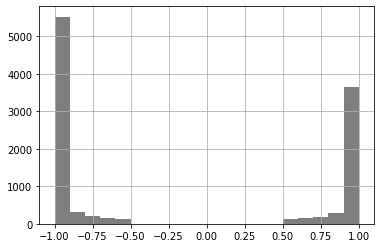

In [ ]:
plt.figure();

sentiments_with_lyrics['HF_fullinput512_one_sentiment_number'].hist(color="k", alpha=0.5, bins=20);

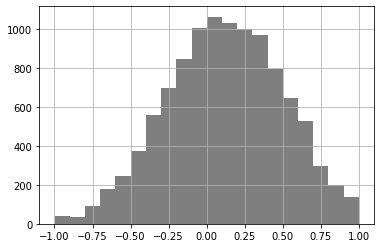

In [ ]:
sentiments_with_lyrics['HF_byline_average_sentiment'].hist(color="k", alpha=0.5, bins=20);

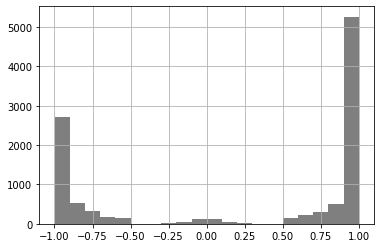

In [ ]:
sentiments_with_lyrics['HF_byline_median_sentiment'].hist(color="k", alpha=0.5, bins=20);

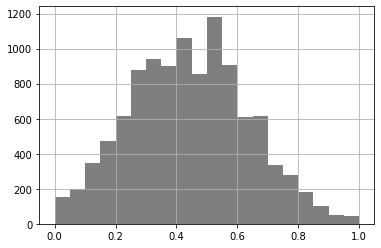

In [ ]:
sentiments_with_lyrics['HF_byline_ratio_negative'].hist(color="k", alpha=0.5, bins=20);

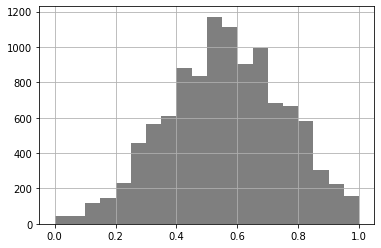

In [ ]:
sentiments_with_lyrics['HF_byline_ratio_positive'].hist(color="k", alpha=0.5, bins=20);

# TO DO: compare with another huggingface sentiment model